Importing libraries
Loading data
Understanding the data

In [1]:
%pip install seaborn

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, mean_squared_error, r2_score

df = pd.read_csv('Student_performance_data.csv')

display(df.head())

print("Data Info:")
display(df.info())
print("\nNull Values:")
display(df.isnull().sum())

df = df.dropna()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


None


Null Values:


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [16]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


Exploratory data Analysis

Univariate

<ipython-input-17-226e217aa8b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GradeClass', palette='viridis')


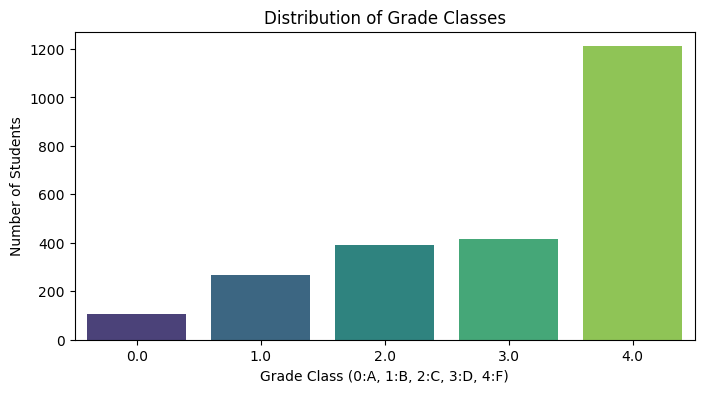

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='GradeClass', palette='viridis')
plt.title('Distribution of Grade Classes')
plt.xlabel('Grade Class (0:A, 1:B, 2:C, 3:D, 4:F)')
plt.ylabel('Number of Students')
plt.show()

<ipython-input-18-5f19bb00a082>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


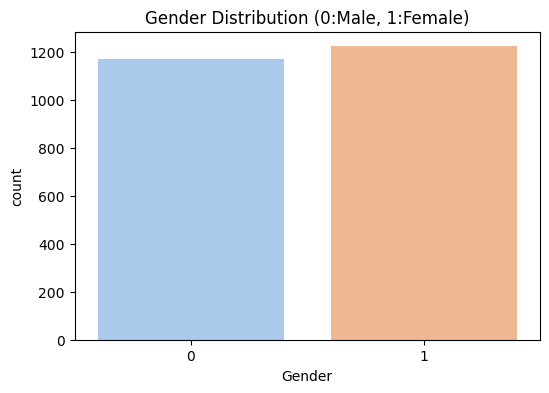

<ipython-input-18-5f19bb00a082>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ParentalEducation', palette='Set2')


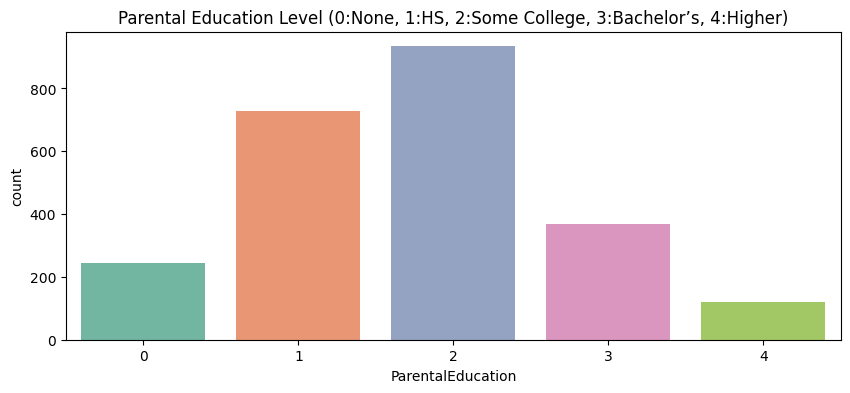

In [18]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution (0:Male, 1:Female)')
plt.show()

# Parental Education
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='ParentalEducation', palette='Set2')
plt.title('Parental Education Level (0:None, 1:HS, 2:Some College, 3:Bachelor’s, 4:Higher)')
plt.show()

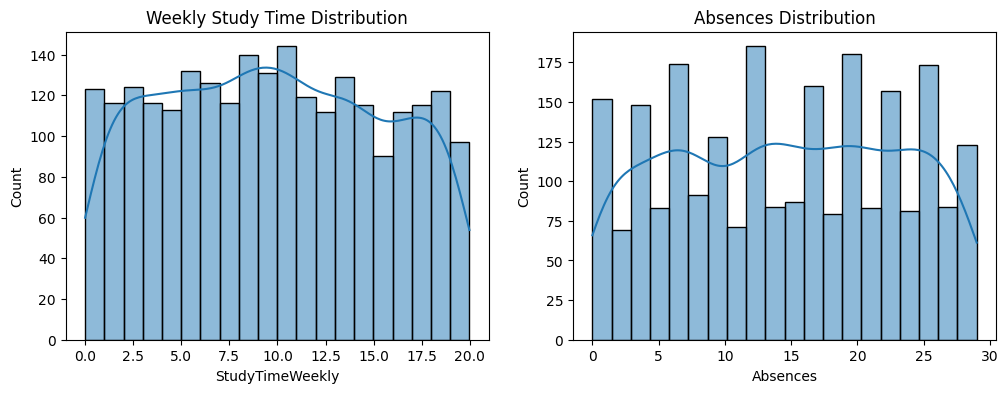

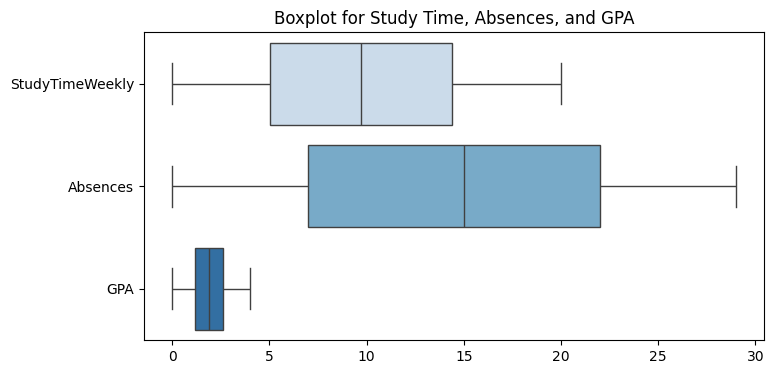

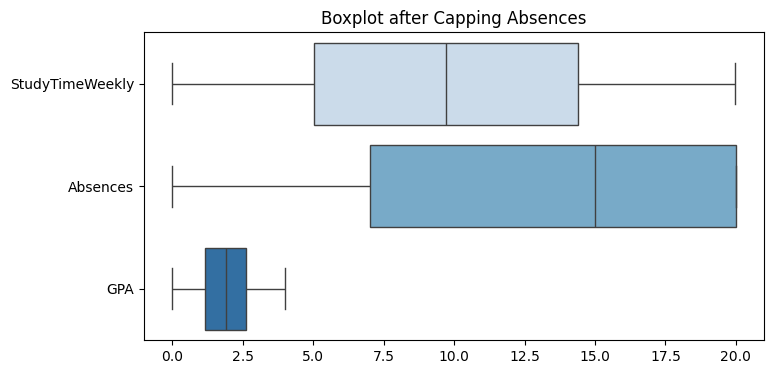

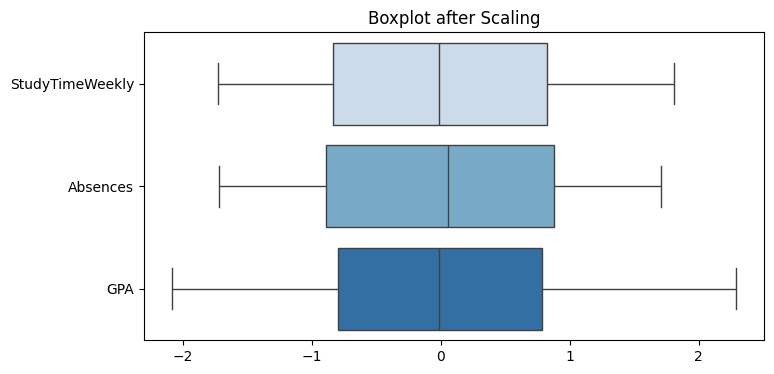

In [19]:
# StudyTime and Absences distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['StudyTimeWeekly'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Weekly Study Time Distribution')
sns.histplot(df['Absences'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Absences Distribution')
plt.show()

# Boxplot for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['StudyTimeWeekly', 'Absences', 'GPA']], palette='Blues', orient='h')
plt.title('Boxplot for Study Time, Absences, and GPA')
plt.show()

# Capping Absence Outliers
df_treated_abCap = df.copy()
absences_cap = df_treated_abCap['Absences'].quantile(0.70)
df_treated_abCap['Absences'] = np.where(df_treated_abCap['Absences'] > absences_cap, absences_cap, df_treated_abCap['Absences'])

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_treated_abCap[['StudyTimeWeekly', 'Absences', 'GPA']], palette='Blues', orient='h')
plt.title('Boxplot after Capping Absences')
plt.show()

# Standard Scaling for StudyTime, Absences, and GPA
scaling_columns = ['StudyTimeWeekly', 'Absences', 'GPA']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[scaling_columns] = scaler.fit_transform(df[scaling_columns])

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_scaled[['StudyTimeWeekly', 'Absences', 'GPA']], palette='Blues', orient='h')
plt.title('Boxplot after Scaling')
plt.show()


Bivariate

<ipython-input-20-9c7c72d3714f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tutoring', y='GPA', palette='coolwarm')


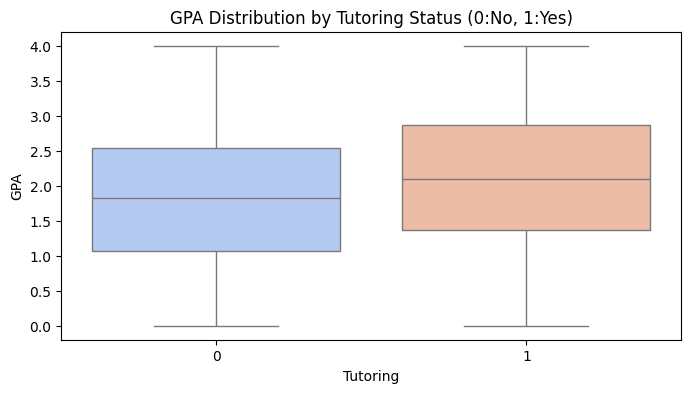

<ipython-input-20-9c7c72d3714f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Extracurricular', y='GPA', palette='muted')


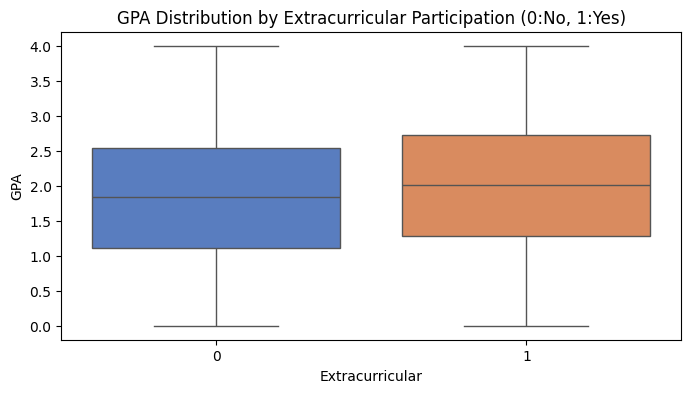

In [20]:
# Tutoring vs. GPA
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Tutoring', y='GPA', palette='coolwarm')
plt.title('GPA Distribution by Tutoring Status (0:No, 1:Yes)')
plt.show()

# Extracurriculars vs. GPA
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Extracurricular', y='GPA', palette='muted')
plt.title('GPA Distribution by Extracurricular Participation (0:No, 1:Yes)')
plt.show()

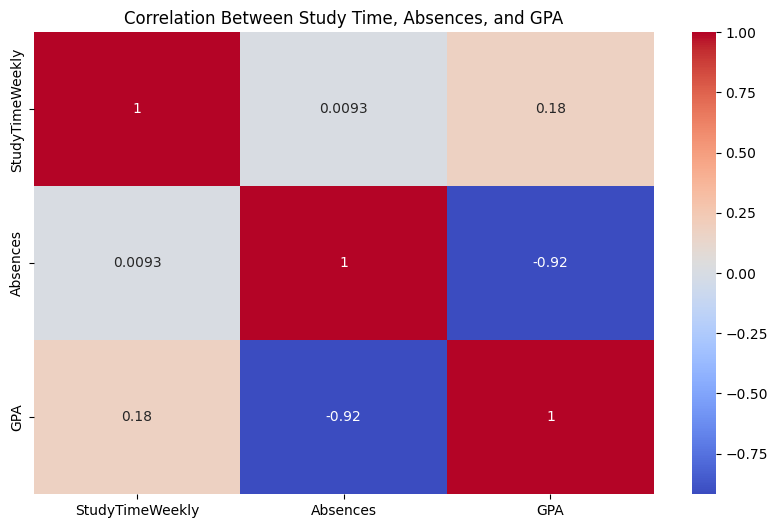

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['StudyTimeWeekly', 'Absences', 'GPA']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Study Time, Absences, and GPA')
plt.show()

<ipython-input-22-dae3445a6989>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TotalActivities', y='GPA', palette='viridis')


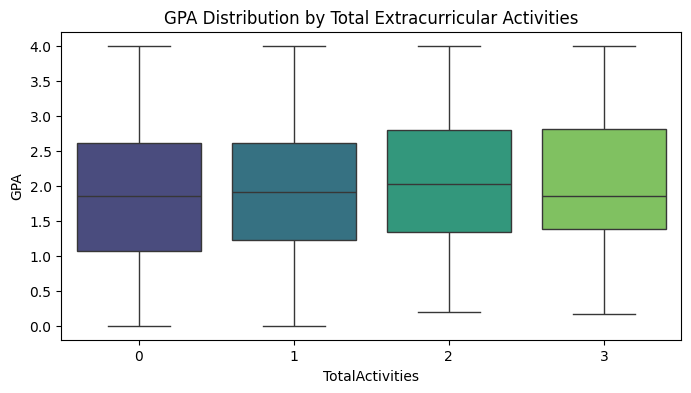

In [22]:
# Create a new feature
df['TotalActivities'] = df['Sports'] + df['Music'] + df['Volunteering']

# Plot impact on GPA
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='TotalActivities', y='GPA', palette='viridis')
plt.title('GPA Distribution by Total Extracurricular Activities')
plt.show()

Features and test_train data split

In [23]:
#I have selected these features based on theid correlation with the target variable from the heatmap in test. I think it would be wise to add that heatmap to main.
features = ['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'GPA']

target = 'GradeClass'

# Splitting the data into features and target variable for each dataframe I tested with the boxplots earlier so we can compare the results from the models.
X_unmodified = df[features]
y_unmodified = df[target]

x_capped = df_treated_abCap[features]
y_capped = df_treated_abCap[target]

X_scaled = df_scaled[features]
y_scaled = df_scaled[target]

# Splitting the data into training and testing sets for each dataframe. Using the same random state and size to ensure comparability.
X_train_unmodified, X_test_unmodified, y_train_unmodified, y_test_unmodified = train_test_split(X_unmodified, y_unmodified, test_size=0.2, random_state=90)
X_train_capped, X_test_capped, y_train_capped, y_test_capped = train_test_split(x_capped, y_capped, test_size=0.2, random_state=90)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=90)

Logistic regression model training

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
log_model = LogisticRegression(random_state=90)
log_model.fit(X_train_scaled, y_train_scaled)
log_scores = cross_val_score(log_model, X_scaled, y_scaled, cv = 5)
y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test_scaled, y_pred_log))
print("Logistic Regression CV score :" , log_scores.mean())

Logistic Regression Accuracy: 0.7954070981210856
Logistic Regression CV score : 0.8014028528751496


In [25]:
# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=90)
nn_model.fit(X_train_scaled, y_train_scaled)
nn_model_scores = cross_val_score(nn_model, X_scaled,y_scaled, cv=5)
y_pred_nn = nn_model.predict(X_test_scaled)
print("Neural Network Accuracy:", accuracy_score(y_test_scaled, y_pred_nn))
print("Neural Network CV score :" , nn_model_scores.mean())

/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer

Neural Network Accuracy: 0.8789144050104384
Neural Network CV score : 0.8895842978310812


In [26]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=90, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_capped, y_train_capped)
xgb_scores = cross_val_score(xgb_model, x_capped, y_capped, cv=5)
y_pred_xgb = xgb_model.predict(X_test_capped)
print("XGBoost Accuracy:", accuracy_score(y_test_capped, y_pred_xgb))
print("XGBoost CV score :" , nn_model_scores.mean())

/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:22] WARNING: /root/repo/packages/xgboost/build/xgboost-2.1.2/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:22] WARNING: /root/repo/packages/xgboost/build/xgboost-2.1.2/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:22] WARNING: /root/repo/packages/xgboost/build/xgboost-2.1.2/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:22] WARNING: /root/repo/packages/xgboost/build/xgboost-2.1.2/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/lib/python3

XGBoost Accuracy: 0.918580375782881
XGBoost CV score : 0.8895842978310812


In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=90)
rf_model.fit(X_train_unmodified, y_train_unmodified)
rf_scores = cross_val_score(rf_model, X_unmodified, y_unmodified, cv=5)
y_pred_rf = rf_model.predict(X_test_unmodified)
print("Random Forest Accuracy:", accuracy_score(y_test_unmodified, y_pred_rf))
print("Rando CV score :" , rf_scores.mean())

Random Forest Accuracy: 0.9227557411273486
Rando CV score : 0.9230212873751975
